In [174]:
## This is a People Aanalytical Test results by Vincent F Dsouza

1. Calculate average Stock Grant by job level, location and fiscal quarter							
2. Calculate average stock grant by job profile and location 							
3. Calculate the average stock grant by FBO/ GM (Functional Business Owner/ General Manager)and fiscal quarter							
4. Provide a summary of your findings. Feel free to include charts, tables or slides to best present your data. 							
							


In [1]:
%matplotlib inline
#%pylab inline
import matplotlib.pyplot as plt
plt.show()

In [13]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame
import csv
# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [39]:
import markdown
import pandas


In [3]:
from __future__ import print_function, division
from patsy import dmatrices, dmatrix

In [4]:
from xlrd import open_workbook

In [6]:
PAT_df = pd.read_excel('PAT.xlsx')

In [7]:
PAT_df.head()

,Employee ID,Hire Date,Job Profile,Job Level,Location,Stock Granted as Amount ($USD),Currency,FBO/GM
NaN,1,2015-07-01,Customer Experience Program Manager 1,3,"Amsterdam, Netherlands",3500,USD,Head of Customers for Life
NaN,2,2015-07-01,Administration Senior Associate H,2,"San Francisco, United States",2500,USD,Head of People
NaN,3,2015-07-01,Experts Program Manager 2,4,Home Office: Germany,4750,USD,Head of Go to Market
NaN,4,2015-07-06,Senior Developer,3,"Sydney, Australia",2750,USD,Head of Tech Communication Tools
NaN,5,2015-07-06,Quality Engineer,2,"Sydney, Australia",2000,USD,Head of Engineering


In [8]:
PAT_df.describe()

,Employee ID,Job Level,Stock Granted as Amount ($USD)
count,450.000000,450.000000,450.000000
mean,225.500000,2.348889,2640.444444
std,130.048068,0.903130,1450.572164
min,1.000000,1.000000,250.000000
25%,113.250000,2.000000,2000.000000
50%,225.500000,2.000000,2500.000000
75%,337.750000,3.000000,3000.000000
max,450.000000,4.000000,8000.000000


The above describe() command shows us a few statistical outputs.
The number of employees are 450 
The Average value of Stock granted  is USD 2640.44.
while
    The lowest stock granted is USD 250 and the highest is USD 8000


In [175]:
## I have used the words bonus when describing Stock Granted in USD

(array([  99.,    1.,  134.,  117.,   41.,   21.,   15.,   13.,    3.,    6.]),
 array([  250.,  1025.,  1800.,  2575.,  3350.,  4125.,  4900.,  5675.,
         6450.,  7225.,  8000.]),
 <a list of 10 Patch objects>)

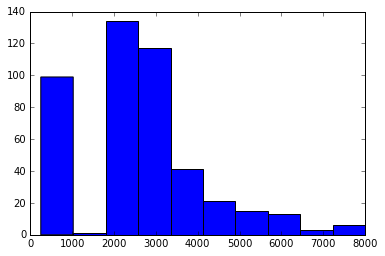

In [12]:
plt.hist(PAT_df["Stock Granted as Amount ($USD)"])

           Figure _ 1 above 

In [26]:
cols_to_keep6 = ['Stock Granted as Amount ($USD)'] 
freq9 = PAT_df[cols_to_keep6]

In [98]:
import matplotlib.ticker as ticker


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


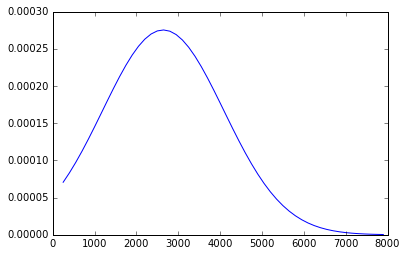

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

range = np.arange(250,8000,150)

std = np.std(freq9)
mean = np.mean(freq9)
plt.plot(range,norm.pdf(range,mean,std))

         Figure_ 2 above

The above normal distibution shows that nearly 50% of the staff has received bonus in the median of USD2500 range.
The tail end of 8000 is an outlier.
The bell curve gives us a sense of how the bonus amounts are distributed in dataset.

In [46]:
# Since the Column headings have Spaces and this can cause issue during indexing of columns , 
#    we can rename using the below lambda function



cols = PAT_df.columns
cols = cols.map(lambda x: x.replace(' ', '_') if isinstance(x, (str, unicode)) else x)
PAT_df.columns = cols

In [47]:
PAT_df.head()

,Employee_ID,Hire_Date,Job_Profile_,Job_Level,Location,Stock_Granted_as_Amount_($USD),Currency,FBO/GM
NaN,1,2015-07-01,Customer Experience Program Manager 1,3,"Amsterdam, Netherlands",3500,USD,Head of Customers for Life
NaN,2,2015-07-01,Administration Senior Associate H,2,"San Francisco, United States",2500,USD,Head of People
NaN,3,2015-07-01,Experts Program Manager 2,4,Home Office: Germany,4750,USD,Head of Go to Market
NaN,4,2015-07-06,Senior Developer,3,"Sydney, Australia",2750,USD,Head of Tech Communication Tools
NaN,5,2015-07-06,Quality Engineer,2,"Sydney, Australia",2000,USD,Head of Engineering


1. Calculate average Stock Grant by job level, location and fiscal quarter

Now we calculate avg bonus by Job level

In [99]:
cols_to_keep1 = ['Job_Level','Location','Hire_Date','Stock_Granted_as_Amount_($USD)'] 
levelgrant = PAT_df[cols_to_keep1]

In [100]:
level_df = pandas.DataFrame(levelgrant)

In [102]:
level_df.head()

,Job_Level,Location,Hire_Date,Stock_Granted_as_Amount_($USD)
NaN,3,"Amsterdam, Netherlands",2015-07-01,3500
NaN,2,"San Francisco, United States",2015-07-01,2500
NaN,4,Home Office: Germany,2015-07-01,4750
NaN,3,"Sydney, Australia",2015-07-06,2750
NaN,2,"Sydney, Australia",2015-07-06,2000


In [105]:
Bon_per_level = level_df[['Stock_Granted_as_Amount_($USD)', 'Job_Level']].groupby('Job_Level').mean()

In [106]:
Bon_per_level

,Stock_Granted_as_Amount_($USD)
Job_Level,
1,979.885057
2,2151.676829
3,3201.461039
4,5712.222222


As per above chart job level 1 gets average bonus of 979.88  and job level 2 gets average bonus of 2151.67

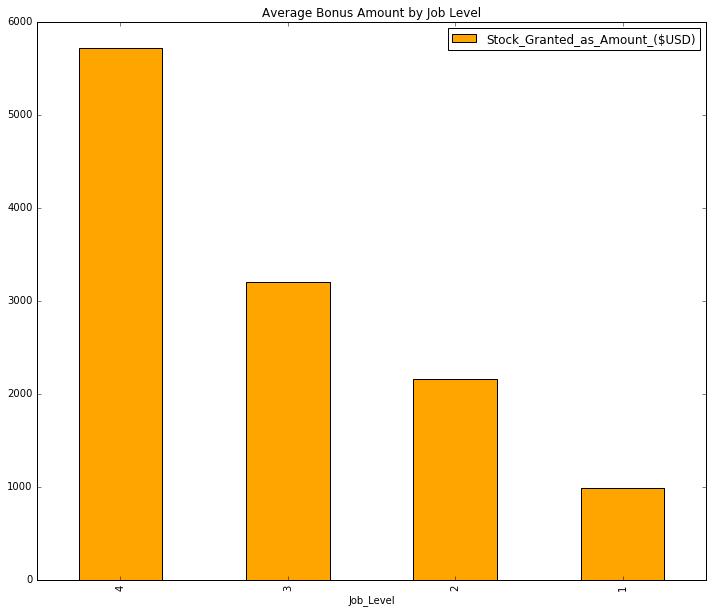

In [110]:
Bon_per_level = level_df[['Stock_Granted_as_Amount_($USD)', 'Job_Level']].groupby('Job_Level').mean()
Bon_per_level.reset_index().sort_values(['Stock_Granted_as_Amount_($USD)','Job_Level'],ascending=[0,1]).plot(kind='bar', x='Job_Level',
                                                                y='Stock_Granted_as_Amount_($USD)',legend ='True',
                                                               color='orange',figsize=(12,10),title ="Average Bonus Amount by Job Level")



                         Figure_ 3 above

In [ ]:
## Now we can do a chart which combines the Job Level with Locations
# This allows us to find out concentration of  job levels located in different locations and the bonus paid out

In [111]:
Levelgroup = PAT_df[['Job_Level','Location','Stock_Granted_as_Amount_($USD)']]
Levelgroup.head()

,Job_Level,Location,Stock_Granted_as_Amount_($USD)
NaN,3,"Amsterdam, Netherlands",3500
NaN,2,"San Francisco, United States",2500
NaN,4,Home Office: Germany,4750
NaN,3,"Sydney, Australia",2750
NaN,2,"Sydney, Australia",2000


In [112]:
Lgroup = Levelgroup.groupby(['Job_Level','Location']).mean()

In [113]:
# This command only shows us  few of top rows in a dataset
Lgroup.head()

Stock_Granted_as_Amount_($USD)
Job_Level Location                                                    
1         Amsterdam, Netherlands                              1000.000
          Austin, United States                               1000.000
          Manila, Philippines                                  250.000
          San Francisco, United States                        1250.000
          Sydney, Australia                                    990.625

Now as per above Table the Average Bonus Paid to a Level-1 person in Sydney Australia is 990.625

And in Manila the Average Bonus paid to a Level-1 person is 250

In [114]:
Lgroup.unstack().head()

Stock_Granted_as_Amount_($USD)                        \
Location          Amsterdam, Netherlands Austin, United States   
Job_Level                                                        
1                            1000.000000           1000.000000   
2                            2013.888889           2282.258065   
3                            3083.333333           3341.379310   
4                            4750.000000           5333.333333   

                                                  \
Location  Home Office: California, United States   
Job_Level                                          
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                         6250.0   

                                                                     \
Location  Home Office: Colorado, United States Home Office: Germany   
Job_Level                                                             
1                                          NaN                  NaN   
2                                          NaN                  NaN   
3                                       3750.0                  NaN   
4                                          NaN               4850.0   

                                                \
Location  Home Office: Maryland, United States   
Job_Level                                        
1                                          NaN   
2                                          NaN   
3                                       3750.0   
4                                          NaN   

                                                     \
Location  Home Office: Massachusetts, United States   
Job_Level                                             
1                                               NaN   
2                                               NaN   
3                                            3750.0   
4                                               NaN   

                                                                   \
Location  Home Office: Montana, United States Manila, Philippines   
Job_Level                                                           
1                                         NaN               250.0   
2                                      3250.0               500.0   
3                                         NaN              1000.0   
4                                         NaN                 NaN   

                                                                          
Location  San Francisco, United States Sydney, Australia Yokohama, Japan  
Job_Level                                                                 
1                          1250.000000        990.625000             NaN  
2                          2861.111111       2083.881579          2000.0  
3                          4363.095238       2953.296703          3000.0  
4                          6892.857143       5171.052632          4750.0

In [178]:
import calmap

In [184]:
colors1 = plt.cm.nipy_spectral(np.linspace(0, 1, 12))

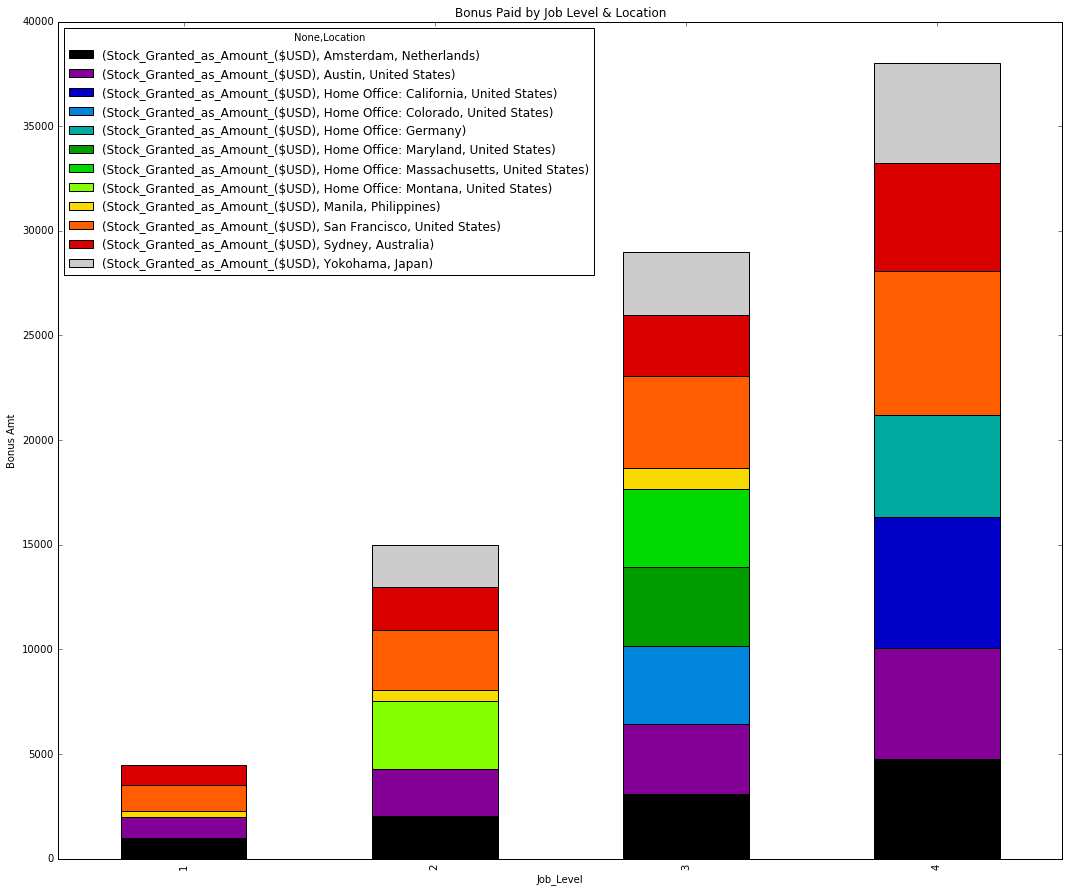

In [185]:
my_plot = Lgroup.unstack().plot(kind='bar',stacked=True,title="Bonus Paid by Job Level & Location", figsize=(18,15), color=colors1)
my_plot.set_xlabel("Job_Level")
my_plot.set_ylabel("Bonus Amt")
#my_plot.legend(["Amsterdam", "Austin_US", "HO_CA_US", "HO_CO_US", "HO_Germany",
               # "HO_MD_US", "HO_MA_US", "HO_MT_US","Manila_Philip", 
               # "SFO_US", "SYD_AUS", "Yokohama_JAP"], loc='upper left', ncol=12)

                                  Figure_4 above

The above chart just proves the table, namely that Manila Philippines does not have any level 4 staff.
And if we look at the first bar on the stacked bar chart, then level 1 in Manila is the smallest slice, which means least bonus in Manila for level-1 staff 

And levels 2, 3 and level 4 jobs are based in Yokohama Japan, 


In [ ]:
# Now we calculate by different fiscal quarters


In [125]:
cols_to_keep2 = ['Hire_Date','Stock_Granted_as_Amount_($USD)'] 
dategrant = PAT_df[cols_to_keep2]

In [126]:
qtr_df = pandas.DataFrame(dategrant)

In [127]:
qtr_df.head()

,Hire_Date,Stock_Granted_as_Amount_($USD)
NaN,2015-07-01,3500
NaN,2015-07-01,2500
NaN,2015-07-01,4750
NaN,2015-07-06,2750
NaN,2015-07-06,2000


In [ ]:
## Now we group as per quarters 

In [128]:
import pandas as pd
import datetime
import numpy as np

In [130]:
# Convert that column into a datetime datatype
qtr_df['Hire_Date'] = pd.to_datetime(qtr_df['Hire_Date'])

In [131]:
# Set the datetime column as the index
qtr_df.index = qtr_df['Hire_Date']

In [134]:
# Group the data by Quarters  and take the mean for each group (i.e. each quarter)
# I have taken the last date in each quarter as the end of business cycle.
z = qtr_df.resample('Q').mean()

In [135]:
z

,Stock_Granted_as_Amount_($USD)
Hire_Date,
2015-09-30,2788.257576
2015-12-31,2841.397849
2016-03-31,2282.258065
2016-06-30,3369.230769


The above table shows that in Sept 2015 quarter the bonus amount on average was 2788.257576.
So now we can plot this average bonus as per quarters

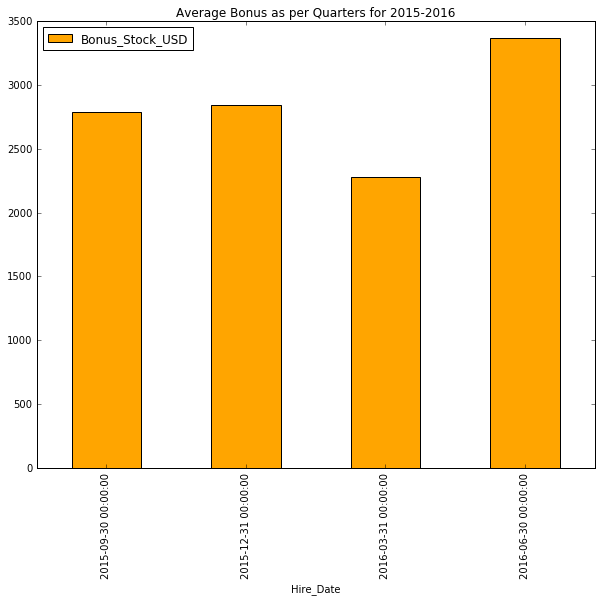

In [139]:
my_plot = z.plot(kind='bar',figsize=(10,8),color='orange',title ="Average Bonus as per Quarters for 2015-2016")
my_plot.legend(["Bonus_Stock_USD"], loc='upper left')

                         Figure_5 above

The highest average bonuses were paid in the June 2016 quarter followed by December 2015 quarter

2.) Calculate average stock grant by job profile and location.

For this I have done seperate Charts by getting average bonus by Job profile and Average bonus by Location.
Lastly I have done a stacked bar chart which combines job profile and locations

In [48]:
cols_to_keep7 = ['Job_Profile_','Location','Stock_Granted_as_Amount_($USD)'] 
stockgrant = PAT_df[cols_to_keep7]

In [51]:
avgstock_df = pandas.DataFrame(stockgrant)

In [49]:
stockgrant.head()

,Job_Profile_,Location,Stock_Granted_as_Amount_($USD)
NaN,Customer Experience Program Manager 1,"Amsterdam, Netherlands",3500
NaN,Administration Senior Associate H,"San Francisco, United States",2500
NaN,Experts Program Manager 2,Home Office: Germany,4750
NaN,Senior Developer,"Sydney, Australia",2750
NaN,Quality Engineer,"Sydney, Australia",2000


In [86]:
# This command gives us the output of average Bonus paid out for example Business Sys Analyst Prog Manager 1 Job profile is held by 3 people 
# hence the mean function gives us the average bonus that is the sum of bonus of 3 people divided by number of instances

avg_per_Profile = avgstock_df[['Job_Profile_', 'Stock_Granted_as_Amount_($USD)']].groupby('Job_Profile_').mean()

In [87]:
avg_per_Profile

,Stock_Granted_as_Amount_($USD)
Job_Profile_,
Accounting Associate,250.000000
Accounting Program Manager 1,1000.000000
Accounting Senior Associate,1000.000000
Administration Senior Associate H,2500.000000
Business Intelligence Program Manager 1,4500.000000
Business Intelligence Senior Associate,2500.000000
Business Systems Analyst Associate,1500.000000
Business Systems Analyst Program Manager 1,3333.333333
Business Systems Analyst Program Manager 2,4750.000000


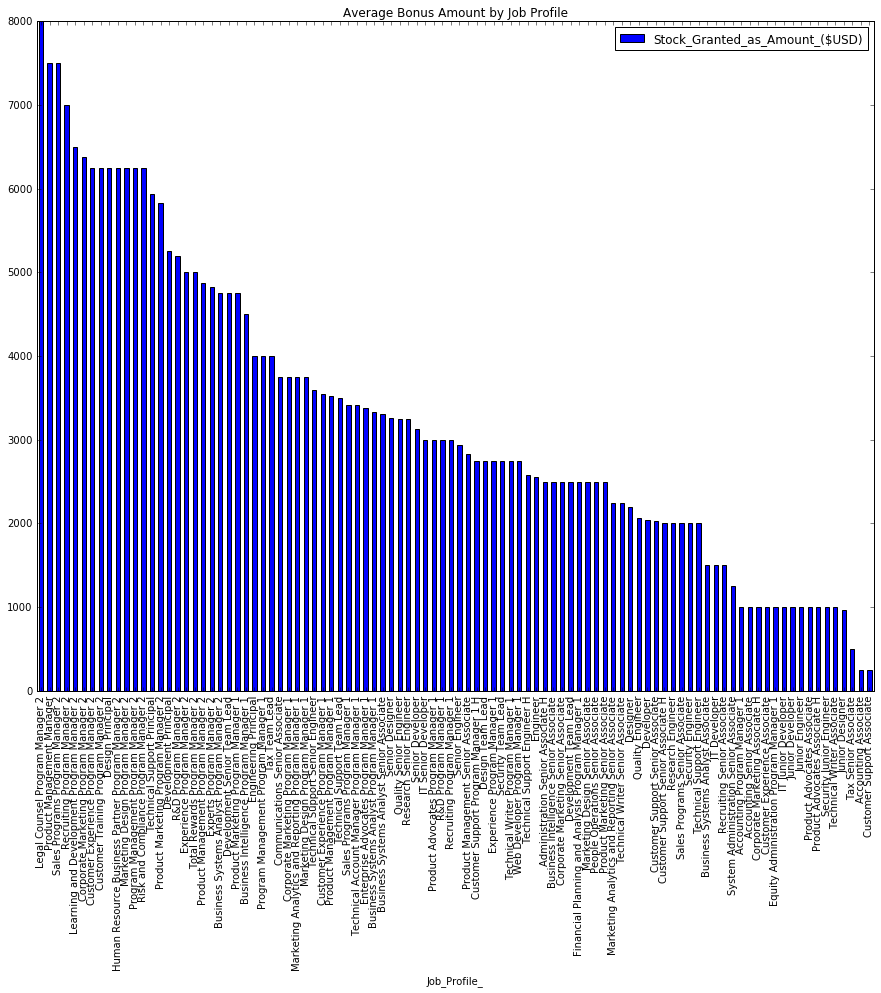

In [96]:
Bon_per_job = avgstock_df[['Stock_Granted_as_Amount_($USD)', 'Job_Profile_']].groupby('Job_Profile_').mean()
Bon_per_job.reset_index().sort_values(['Stock_Granted_as_Amount_($USD)','Job_Profile_'],ascending=[0,1]).plot(kind='bar', x='Job_Profile_',
                                                                y='Stock_Granted_as_Amount_($USD)',legend ='True',
                                                               color='blue',figsize=(15,12),title ="Average Bonus Amount by Job Profile")




                                 Figure_ 6 above 

The above chart shows that highest average bonus was paid for Legal Counsel program manager which was 8000 and the 
lowest was for Customer Support Associate and Accounting Associate at 250 each .

 Now we look at Locations 
The below chart shows that average bonus paid at HO California is 6250 
The average bonus for Sydney Australia is 2273 as per below chart

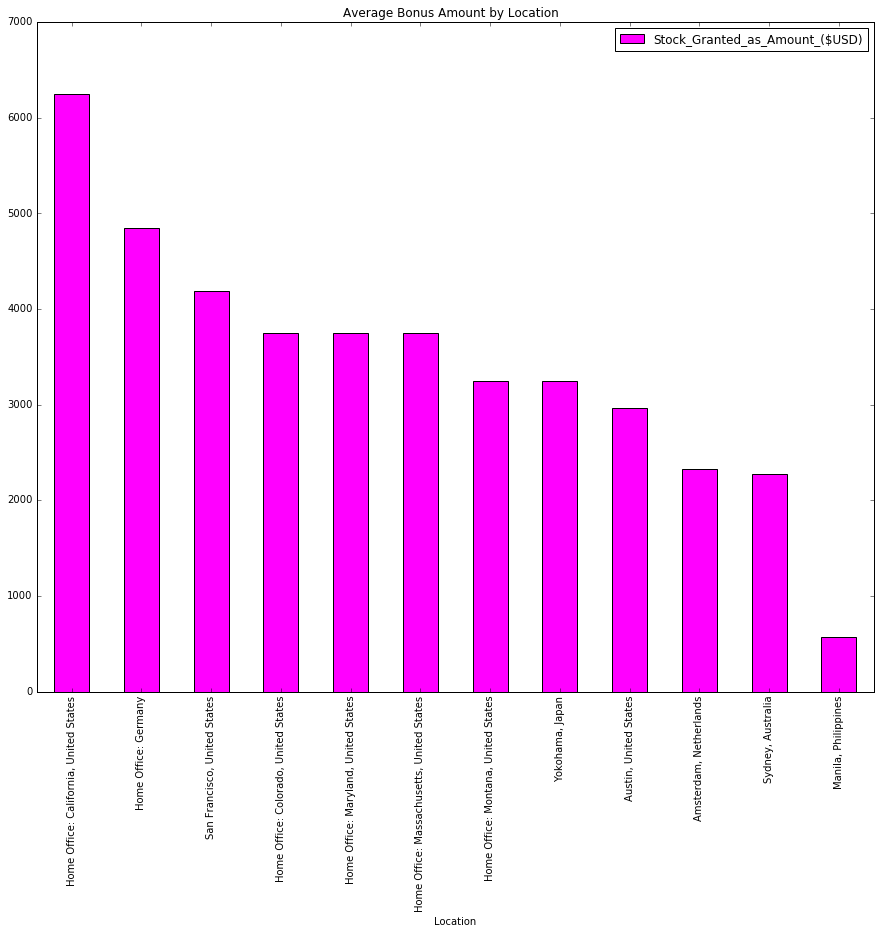

In [124]:
Bon_per_loc = avgstock_df[['Stock_Granted_as_Amount_($USD)', 'Location']].groupby('Location').mean()
Bon_per_loc.reset_index().sort_values(['Stock_Granted_as_Amount_($USD)','Location'],ascending=[0,1]).plot(kind='bar', x='Location',
                                                                y='Stock_Granted_as_Amount_($USD)',legend ='True',
                                                               color='magenta',figsize=(15,12),title ="Average Bonus Amount by Location  ")



                         Figure_ 7 above

In [56]:
customermonth = avgstock_df[['Job_Profile_','Stock_Granted_as_Amount_($USD)','Location']]
customermonth.head()


#avg_per_Profile = avgstock_df[['Job_Profile_', 'Stock_Granted_as_Amount_($USD)']].groupby('Job_Profile_').mean()

,Job_Profile_,Stock_Granted_as_Amount_($USD),Location
NaN,Customer Experience Program Manager 1,3500,"Amsterdam, Netherlands"
NaN,Administration Senior Associate H,2500,"San Francisco, United States"
NaN,Experts Program Manager 2,4750,Home Office: Germany
NaN,Senior Developer,2750,"Sydney, Australia"
NaN,Quality Engineer,2000,"Sydney, Australia"


In [57]:
monthgroup = customermonth.groupby(['Job_Profile_','Location']).mean()

In [58]:
monthgroup.head()

Stock_Granted_as_Amount_($USD)
Job_Profile_                      Location                                                    
Accounting Associate              Manila, Philippines                                    250.0
Accounting Program Manager 1      Manila, Philippines                                   1000.0
Accounting Senior Associate       Manila, Philippines                                    500.0
                                  Sydney, Australia                                     2000.0
Administration Senior Associate H San Francisco, United States                          2500.0

In [59]:
monthgroup.unstack().head()

Stock_Granted_as_Amount_($USD)  \
Location                                        Amsterdam, Netherlands   
Job_Profile_                                                             
Accounting Associate                                               NaN   
Accounting Program Manager 1                                       NaN   
Accounting Senior Associate                                        NaN   
Administration Senior Associate H                                  NaN   
Business Intelligence Program Manager 1                            NaN   

                                                               \
Location                                Austin, United States   
Job_Profile_                                                    
Accounting Associate                                      NaN   
Accounting Program Manager 1                              NaN   
Accounting Senior Associate                               NaN   
Administration Senior Associate H                         NaN   
Business Intelligence Program Manager 1                   NaN   

                                                                                \
Location                                Home Office: California, United States   
Job_Profile_                                                                     
Accounting Associate                                                       NaN   
Accounting Program Manager 1                                               NaN   
Accounting Senior Associate                                                NaN   
Administration Senior Associate H                                          NaN   
Business Intelligence Program Manager 1                                    NaN   

                                                                              \
Location                                Home Office: Colorado, United States   
Job_Profile_                                                                   
Accounting Associate                                                     NaN   
Accounting Program Manager 1                                             NaN   
Accounting Senior Associate                                              NaN   
Administration Senior Associate H                                        NaN   
Business Intelligence Program Manager 1                                  NaN   

                                                              \
Location                                Home Office: Germany   
Job_Profile_                                                   
Accounting Associate                                     NaN   
Accounting Program Manager 1                             NaN   
Accounting Senior Associate                              NaN   
Administration Senior Associate H                        NaN   
Business Intelligence Program Manager 1                  NaN   

                                                                              \
Location                                Home Office: Maryland, United States   
Job_Profile_                                                                   
Accounting Associate                                                     NaN   
Accounting Program Manager 1                                             NaN   
Accounting Senior Associate                                              NaN   
Administration Senior Associate H                                        NaN   
Business Intelligence Program Manager 1                                  NaN   

                                                                                   \
Location                                Home Office: Massachusetts, United States   
Job_Profile_                                                                        
Accounting Associate                                                          NaN   
Accounting Program Manager 1                                                  NaN   
Accounting Senior Associate                      

In [60]:
import calmap

In [61]:
colors = plt.cm.gist_rainbow(np.linspace(0, 1, 12))

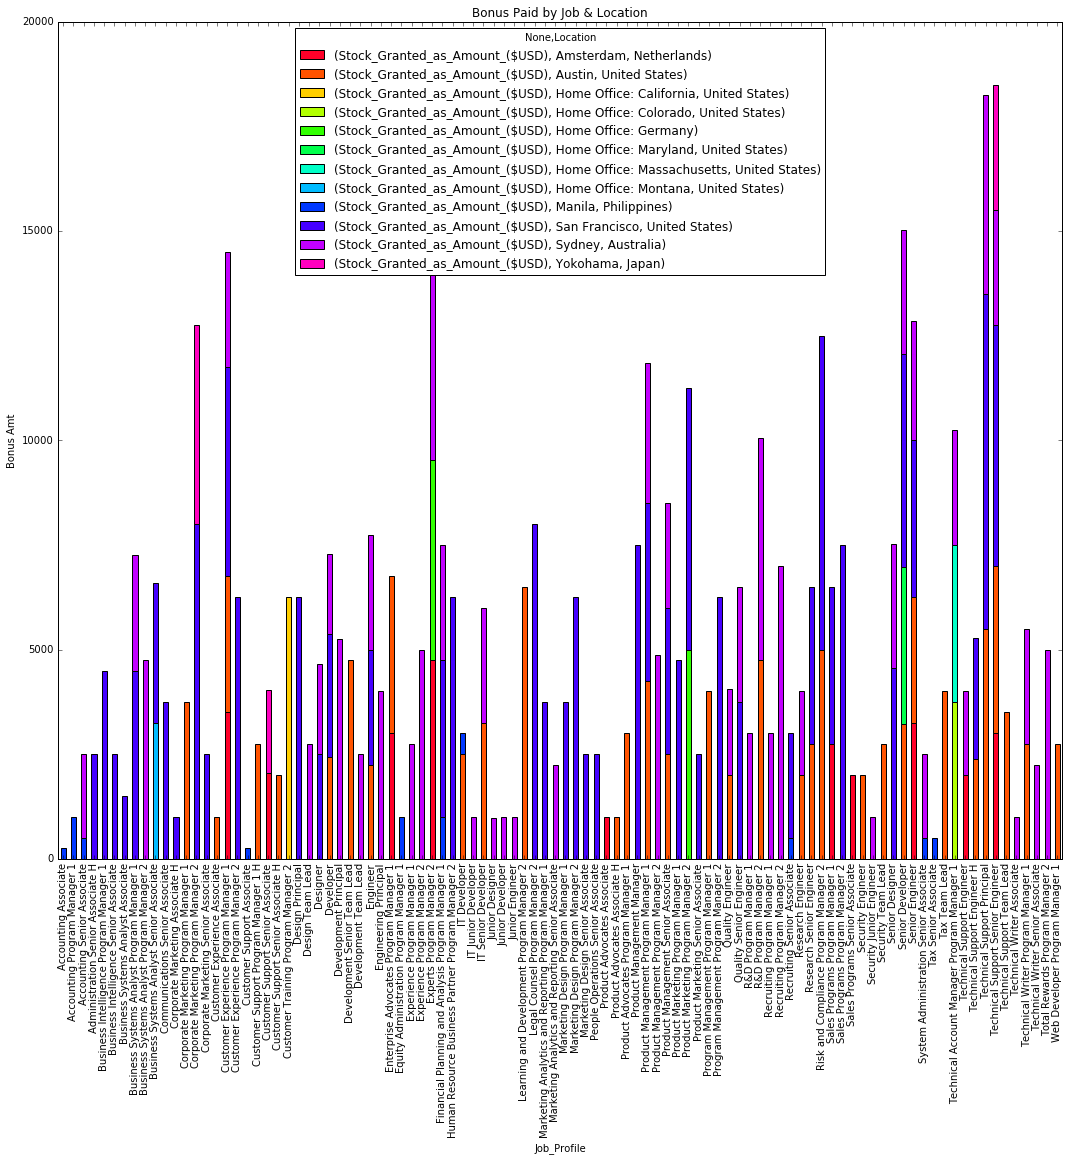

In [78]:
my_plot = monthgroup.unstack().plot(kind='bar',stacked=True,title="Bonus Paid by Job & Location", figsize=(18,15), color=colors)
my_plot.set_xlabel("Job_Profile")
my_plot.set_ylabel("Bonus Amt")
#my_plot.legend(["Amsterdam", "Austin_US", "HO_CA_US", "HO_CO_US", "HO_Germany",
               # "HO_MD_US", "HO_MA_US", "HO_MT_US","Manila_Philippines", 
                #"SFO_US", "SYD_AUS", "Yokohama_JAP"], loc='upper left', ncol=12)

                         Figure_ 8 above

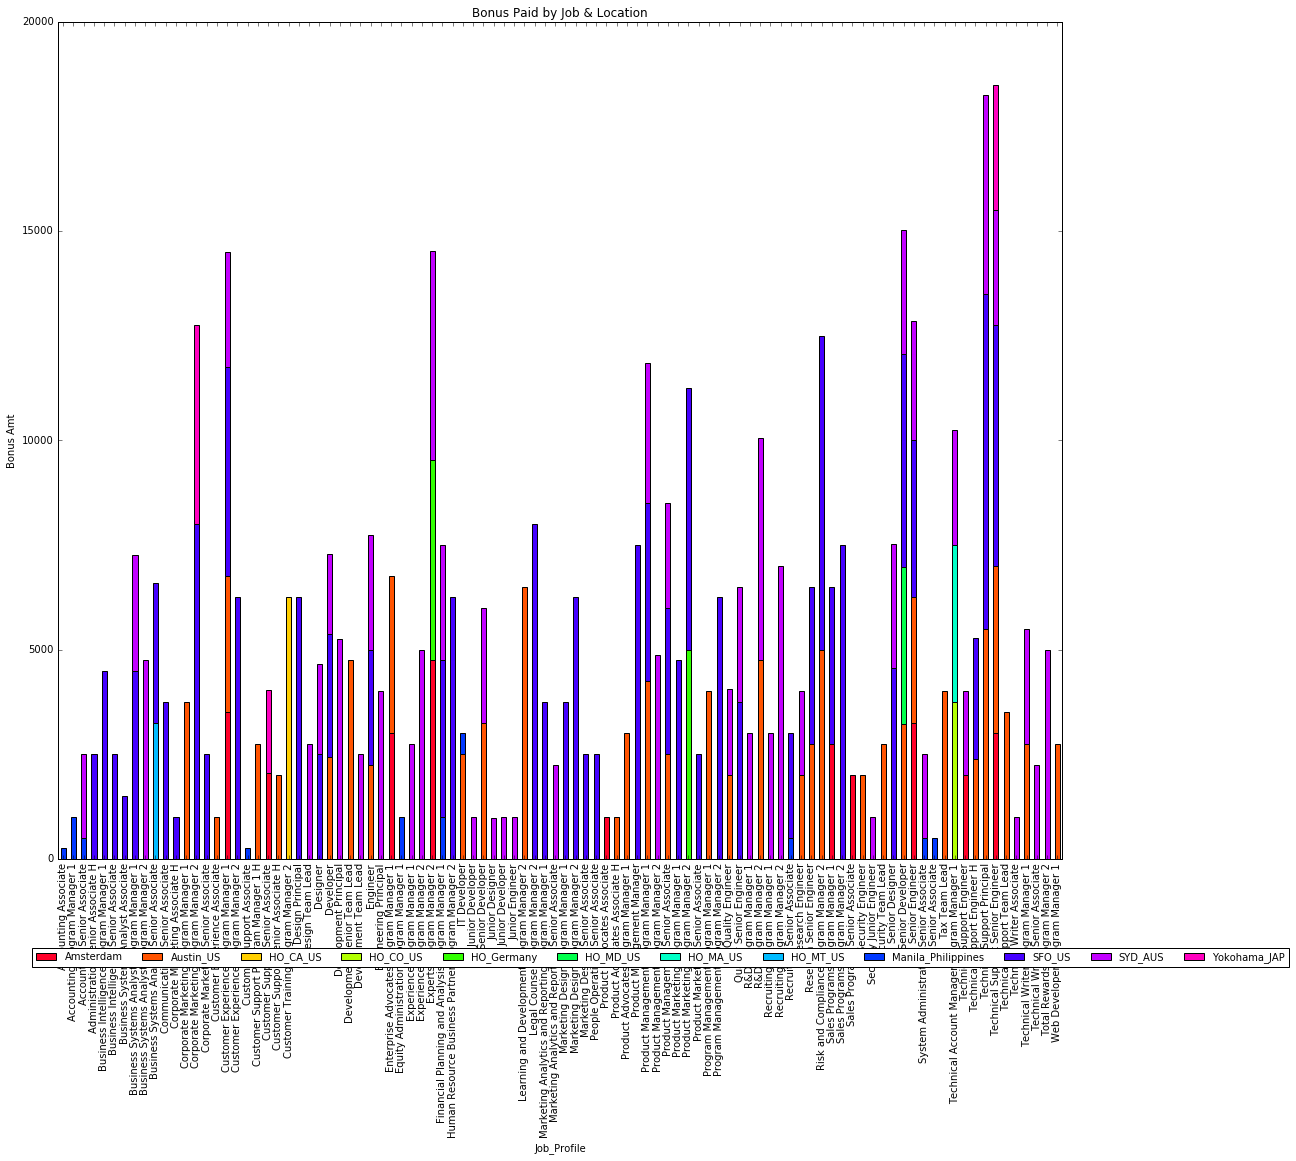

In [85]:
my_plot = monthgroup.unstack().plot(kind='bar',stacked=True,title="Bonus Paid by Job & Location", figsize=(18,15), color=colors)
my_plot.set_xlabel("Job_Profile")
my_plot.set_ylabel("Bonus Amt")
my_plot.legend(["Amsterdam", "Austin_US", "HO_CA_US", "HO_CO_US", "HO_Germany",
               "HO_MD_US", "HO_MA_US", "HO_MT_US","Manila_Philippines", 
                "SFO_US", "SYD_AUS", "Yokohama_JAP"],loc= 9,bbox_to_anchor=(0.6, -0.1),prop={'size':10},ncol=12)




                         Figure_ 9 above

3.) Calculate the average stock grant by FBO/ GM (Functional Business Owner/ General Manager)and fiscal quarter

In [ ]:
## Now we calculate average bonus by FBO 

In [140]:
cols_to_keep41 = ['FBO/GM','Location','Hire_Date','Stock_Granted_as_Amount_($USD)'] 
FBOgrant = PAT_df[cols_to_keep41]

In [141]:
grantFBO_df = pandas.DataFrame(FBOgrant)

In [152]:
grantFBO_df.head()

,FBO/GM,Location,Hire_Date,Stock_Granted_as_Amount_($USD)
NaN,Head of Customers for Life,"Amsterdam, Netherlands",2015-07-01,3500
NaN,Head of People,"San Francisco, United States",2015-07-01,2500
NaN,Head of Go to Market,Home Office: Germany,2015-07-01,4750
NaN,Head of Tech Communication Tools,"Sydney, Australia",2015-07-06,2750
NaN,Head of Engineering,"Sydney, Australia",2015-07-06,2000


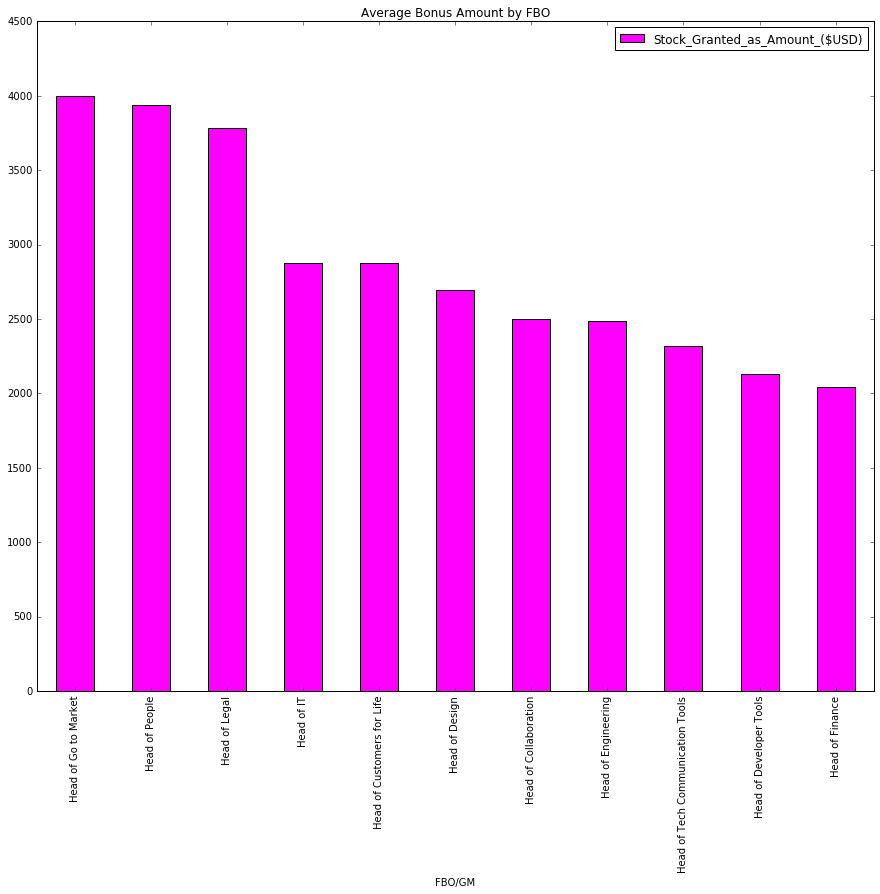

In [142]:
Bon_per_FBO = grantFBO_df[['Stock_Granted_as_Amount_($USD)', 'FBO/GM']].groupby('FBO/GM').mean()
Bon_per_FBO.reset_index().sort_values(['Stock_Granted_as_Amount_($USD)','FBO/GM'],ascending=[0,1]).plot(kind='bar', x='FBO/GM',
                                                                y='Stock_Granted_as_Amount_($USD)',legend ='True',
                                                               color='magenta',figsize=(15,12),title ="Average Bonus Amount by FBO")



                          Figure_ 10 above

The above chaart shows us that Average Bonus paid for FBO of Go_TO_Market is 4001 which is highest bonus amount among other deptartments.
The smallest department bonus is for Head of Finance which is 2045.



In [ ]:
# Now we look at the quarters and FBO 

In [143]:
cols_to_keep42 = ['Hire_Date','FBO/GM','Stock_Granted_as_Amount_($USD)'] 
FBOqtr = PAT_df[cols_to_keep42]

In [144]:
QtrFBO_df = pandas.DataFrame(FBOqtr)

In [145]:
## Now we group as per quarters 

In [146]:
import pandas as pd
import datetime
import numpy as np

In [160]:
# Convert that column into a datetime datatype
QtrFBO_df['Hire_Date'] = pd.to_datetime(QtrFBO_df['Hire_Date'])

In [161]:
# Set the datetime column as the index
QtrFBO_df.index = QtrFBO_df['Hire_Date']

In [149]:
# Group the data by Quarters  and take the mean for each group (i.e. each quarter)
# I have taken the last date in each quarter as the end of business cycle.
j = QtrFBO_df.resample('Q').mean()

In [150]:
j

,Stock_Granted_as_Amount_($USD)
Hire_Date,
2015-09-30,2788.257576
2015-12-31,2841.397849
2016-03-31,2282.258065
2016-06-30,3369.230769


In [151]:
import pandas as pd
import numpy as np
import random

In [153]:
#cols_to_keep45 = ['FBO/GM','Stock_Granted_as_Amount_($USD)'] 
#FBOqtr51 = QtrFBO_df[cols_to_keep45]

In [157]:
#QtrFBO56_df = pandas.DataFrame(FBOqtr51)

In [162]:
grouped = QtrFBO_df.groupby('FBO/GM')

In [166]:
result2 = grouped.apply(lambda x: x.set_index('Hire_Date').resample('Q', how=[np.mean]))

C:\Users\vincent\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  if __name__ == '__main__':


In [167]:
result2

Stock_Granted_as_Amount_($USD)
                                                                      mean
FBO/GM                           Hire_Date                                
Head of Collaboration            2015-09-30                    2500.000000
                                 2015-12-31                            NaN
                                 2016-03-31                            NaN
                                 2016-06-30                    2500.000000
Head of Customers for Life       2015-09-30                    2400.000000
                                 2015-12-31                    3216.666667
                                 2016-03-31                    2838.235294
                                 2016-06-30                    3600.000000
Head of Design                   2015-09-30                    3038.461538
                                 2015-12-31                    3306.818182
                                 2016-03-31                    1950.000000
                                 2016-06-30                    2700.000000
Head of Developer Tools          2015-09-30                    2156.250000
                                 2015-12-31                    2234.375000
                                 2016-03-31                    2051.724138
                                 2016-06-30                    2500.000000
Head of Engineering              2015-09-30                    2544.117647
                                 2015-12-31                    2675.000000
                                 2016-03-31                    2367.647059
                                 2016-06-30                    2500.000000
Head of Finance                  2015-09-30                    2527.777778
                                 2015-12-31                    1568.181818
                                 2016-03-31                    2125.000000
                                 2016-06-30                    2000.000000
Head of Go to Market             2015-09-30                    4130.000000
                                 2015-12-31                    3200.000000
                                 2016-03-31                    4000.000000
                                 2016-06-30                    6250.000000
Head of IT                       2015-09-30                    1000.000000
                                 2015-12-31                    4750.000000
Head of Legal                    2015-09-30                    1937.500000
                                 2015-12-31                    3500.000000
                                 2016-03-31                    7500.000000
                                 2016-06-30                    8000.000000
Head of People                   2015-09-30                    3500.000000
                                 2015-12-31                    3125.000000
                                 2016-03-31                    5000.000000
Head of Tech Communication Tools 2015-09-30                    3172.413793
                                 2015-12-31                    3162.500000
                                 2016-03-31                    1642.361111
                                 2016-06-30                    3307.142857

The above table shows us that Head of Collobration had an average bonus of 2500 for Sept quarter, and for Head of Tech Communications
the bonus was paid in all the quarters.


In [168]:
result2.unstack().head()

Stock_Granted_as_Amount_($USD)               \
                                                     mean                
Hire_Date                                      2015-09-30   2015-12-31   
FBO/GM                                                                   
Head of Collaboration                         2500.000000          NaN   
Head of Customers for Life                    2400.000000  3216.666667   
Head of Design                                3038.461538  3306.818182   
Head of Developer Tools                       2156.250000  2234.375000   
Head of Engineering                           2544.117647  2675.000000   

                                                    
                                                    
Hire_Date                    2016-03-31 2016-06-30  
FBO/GM                                              
Head of Collaboration               NaN     2500.0  
Head of Customers for Life  2838.235294     3600.0  
Head of Design              1950.000000     2700.0  
Head of Developer Tools     2051.724138     2500.0  
Head of Engineering         2367.647059     2500.0

In [169]:
import calmap

In [170]:
colors8 = plt.cm.gist_rainbow(np.linspace(0, 1, 11))

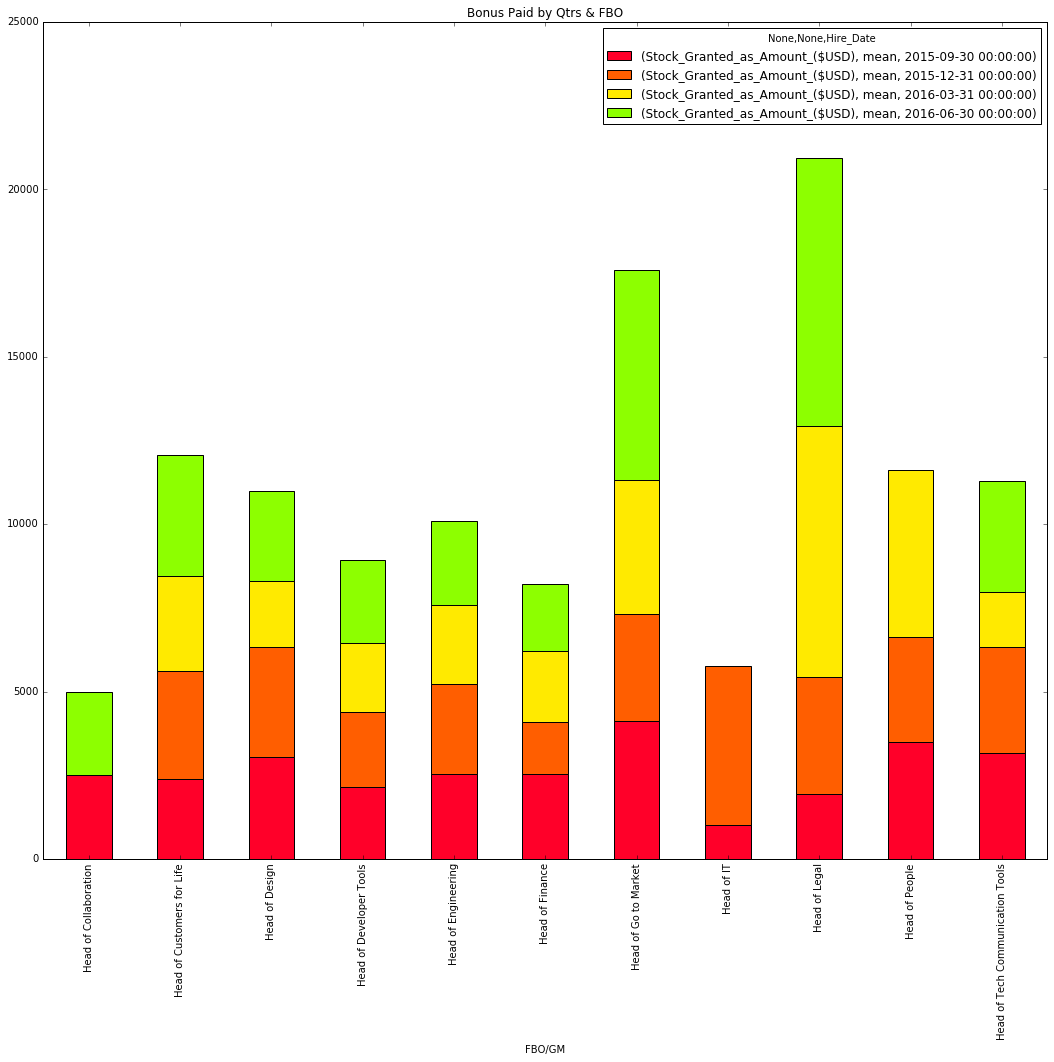

In [173]:
my_plot = result2.unstack().plot(kind='bar',stacked=True,title="Bonus Paid by Qtrs & FBO", figsize=(18,15), color=colors8)
#my_plot.set_xlabel("Job_Profile")
#my_plot.set_ylabel("Bonus Amt")

                                    Figure_ 11 above

The chart show us that maxmium average bonus every quarter were paid to the Head of Legal followed by Head of GoTo Market.


# Findings and Summary 

Figure_ 1 and Figure_2 shows that :
The number of employees are 450.   The Average value of Stock granted is USD 2640.44.   

While The lowest stock granted is USD 250 and the highest is USD 8000

Figure_3 shows that :

The Level - 4 people have the highest average bonus paid out that is USD 5712
While the lowest is for Level- 1 people which is USD 980


Figure_4 shows that :

The level 4 staff is present in 7 locations globally, while level 1 staff is present in 5 locations.

The level 4 staff get paid the highest average bonus amounts while level 1 staff are at lowest end of bonus payment order.

Manila Philippines does not have any level 4 staff. And if we look at the first bar on the stacked bar chart, then level 1 in Manila is the smallest slice, which means least bonus in Manila for level-1 staff. 


Figure_5 shows that :
    The highest average bonuses were paid in the June 2016 quarter followed by December 2015 quarter

Figure_6 shows that: 
The above chart shows that highest average bonus was paid for Legal Counsel program manager which was 8000 
and the lowest was for Customer Support Associate and Accounting Associate at 250 each .

Figure_ 7 shows that :

    The average bonus paid as per Location , the highest bonus payment happened in HO_California at USD 6250 , followed 
    by HO_Germany at USD 4850.
    

Figure_ 8 and Figure_9 are Stacked Charts which shows us the average bonus paid out for different job profiles and their respective locations.

Figure_10 shows that:

The above chart shows us that Average Bonus paid for FBO of Go_TO_Market is USD 4001 which is highest bonus amount among other deptartments.
Followed by FOB Head_of_People at USD 3938.

The smallest department bonus is for Head of Finance which is 2045.

Figure_11 shows that: 
    This chart is a Stacked chart which gives each quarter breakdown by FOB
    The highest average bonuses were paid to Head of Legal in March 2016 and June2016 quarter.
    